<a href="https://colab.research.google.com/github/sun-fox/Deep-Learning-CNN/blob/master/Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Model  
from keras.layers import Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
import random
import cv2
import pandas as pd
import pickle

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [4]:
with open("german-traffic-signs/train.p", 'rb') as f:
    train_data = pickle.load(f)
with open("german-traffic-signs/test.p", 'rb') as f:
    test_data = pickle.load(f)
with open("german-traffic-signs/valid.p", 'rb') as f:
    val_data = pickle.load(f)
print(type(train_data))

<class 'dict'>


In [0]:
X_train,y_train = train_data['features'], train_data['labels']
X_test,y_test = test_data['features'], test_data['labels']
X_val,y_val = val_data['features'], val_data['labels']

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

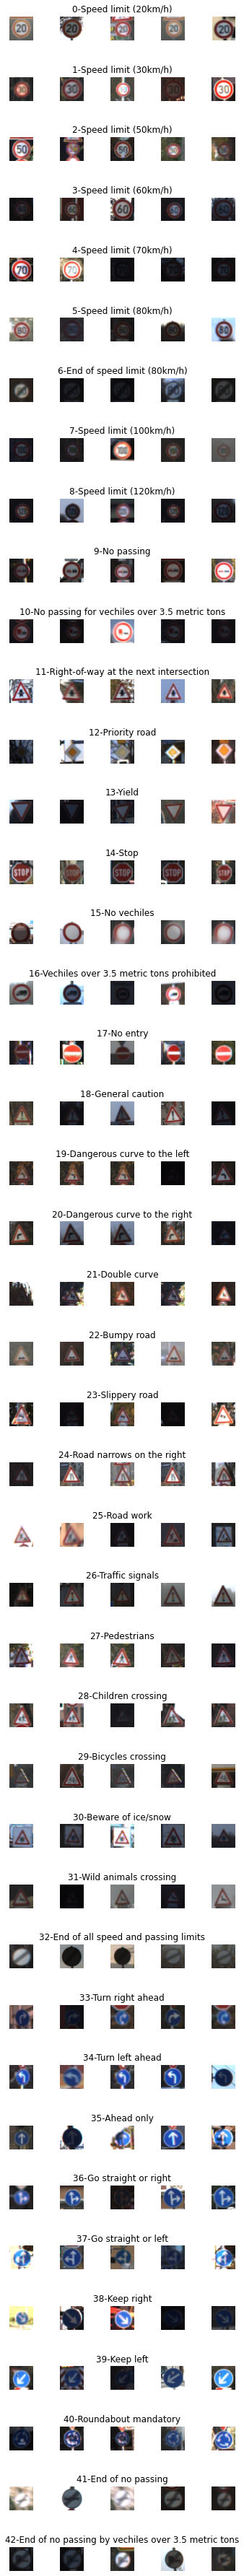

In [8]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []
cols=5
num_classes=43

fig,axs = plt.subplots(nrows=num_classes,ncols = cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j)+"-"+row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


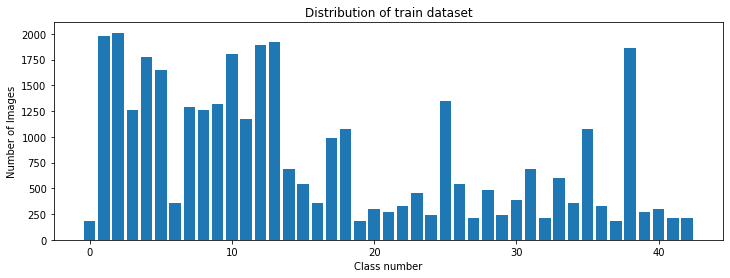

In [9]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")
plt.show()

(-0.5, 31.5, 31.5, -0.5)

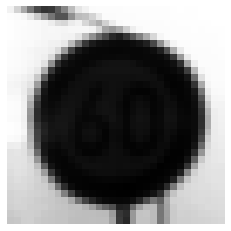

In [10]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
img = grayscale(X_train[5489])
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.axis("off")

(32, 32)


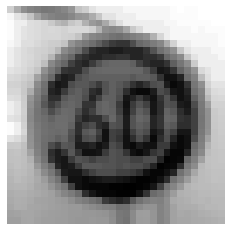

In [11]:
def equalize(img):
    img= cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.axis('off')
print(img.shape)

In [0]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_val = np.array(list(map(preprocessing,X_val)))

(34799, 32, 32)


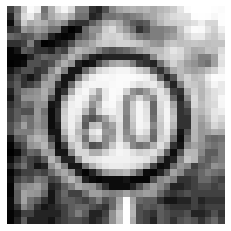

In [13]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)],cmap=plt.get_cmap('gray'))
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
X_val = X_val.reshape(4410,32,32,1)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [0]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(500,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [0]:
model = leNet_model()
# print(model.summary())

In [19]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 8s 241us/step - loss: 2.4672 - accuracy: 0.3384 - val_loss: 0.8011 - val_accuracy: 0.7834
Epoch 2/10
34799/34799 [==============================] - 2s 47us/step - loss: 0.7361 - accuracy: 0.7744 - val_loss: 0.3014 - val_accuracy: 0.9161
Epoch 3/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.3989 - accuracy: 0.8754 - val_loss: 0.1890 - val_accuracy: 0.9465
Epoch 4/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.2832 - accuracy: 0.9116 - val_loss: 0.1422 - val_accuracy: 0.9587
Epoch 5/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.2201 - accuracy: 0.9291 - val_loss: 0.1064 - val_accuracy: 0.9712
Epoch 6/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.1850 - accuracy: 0.9423 - val_loss: 0.0949 - val_accuracy: 0.9746
Epoch 7/10
34799/34799 [==============================] - 2s 47us/st

Text(0.5, 0, 'epoch')

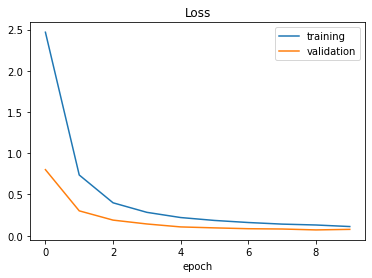

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [0]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.legend(['training','validation'])
# plt.title('Accuracy')
# plt.xlabel('epoch')

In [22]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test score:',score[0])
print('Test accuracy:',score[1])

Test score: 0.13967240128020209
Test accuracy: 0.9577197432518005


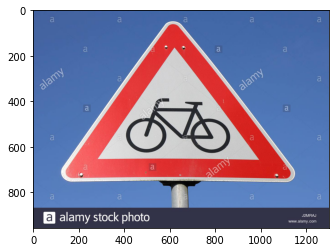

In [23]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


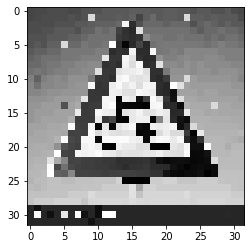

In [24]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [25]:
img = img.reshape(1, 32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [25]
